## Parametric Plots/Vectors


[3D plotting with scatter](https://www.geeksforgeeks.org/three-dimensional-plotting-in-python-using-matplotlib/)  
[some quiver examples](https://www.pythonpool.com/matplotlib-quiver/)  
[basic helpful 3D arrows](https://stackoverflow.com/questions/50429410/how-to-draw-axes-passing-through-the-origin-in-a-3d-plot-using-matplotlib)

[control arrowhead maybe](https://github.com/matplotlib/matplotlib/issues/11746)

### What I want to accomplish

What I'd really like to do is plot a 'curved' parametric path. Overlay two different vector origins. Show that dr/dt is the same in any choice of coordinate.

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

Create a linear space of 100 points to parameterize the path. Pick a starting point for the path. I set three scaling factors so I could shrink or stretch the curve along any axis. I then pick some random different parameterizations along each axis for fun.

In [111]:
# 100 points on parameterized curve - sParameter = sP
sP = np.linspace(0,10,101)

# parameterized line - initial points
xInitial = 0.
yInitial = 0.
zInitial = 0.

# different axis scaling factors to allow manipulation of the path shape in space
xScale = .9
yScale = 1.6
zScale = 1.4

xR = xInitial + xScale*sP
yR = yInitial + yScale*sP
zR = zInitial + zScale*sP


Because of the way that matplotlib expects it's arguments for 3D plots I need to define each origin in a way which sense in the normal world - (x,yz) - and the translate that into the x tuple, y tuple, and z tuple of the origins. I have to assume a particular number of vectors to define the size of the elements of the tuple. This notebook assumes only 2 vectors being drawn from each origin.

Because ax.quiver plots an arrow whose tip is a particular distance from the defined origin I needed to play some games to plot arrows from different origins to the same two points on the parameterized path. Appears to work for any two origins now but I haven't checked it extensively.

In [115]:
# Define two origins - any three values x,y,z
xO1, yO1, zO1 = [0.,0.,0.]
xO2, yO2, zO2 = [8.,0.,12.]

# create 3D plotting tuples that define the origin for each pair of vectors
# the assumption is that there are JUST 2 vectors from each origin: 
# t for tuple, x for axis, O for Origin, 1 or 2 for which origin
txO1, tyO1, tzO1 = [[xO1,xO1],[yO1,yO1],[zO1,zO1]]
txO2, tyO2, tzO2 = [[xO2,xO2],[yO2,yO2],[zO2,zO2]]

# Pick two points on parameterized curve - of the 101 points defined previously.
s1 = 40
s2 = 60

# define plotting tuples for the two parameterized points listed above
xR2 = [xR[s1]-xO1,xR[s2]-xO1]
yR2 = [yR[s1]-yO1,yR[s2]-yO1]
zR2 = [zR[s1]-zO1,zR[s2]-zO1]

# Plotting tuples for second origin
xR3 = [(xR2[0]+(xO1-xO2)),(xR2[1]+(xO1-xO2))]
yR3 = [(yR2[0]+(yO1-yO2)),(yR2[1]+(yO1-yO2))]
zR3 = [(zR2[0]+(zO1-zO2)),(zR2[1]+(zO1-zO2))]

Not sure if I have to create this figure as a subplot but it does seem to work. I don't have a very clear picture of how the figure environment keeps track of all of this stuff. Turns out both the linewidth and color arguments can be (but don't have to be) tuples if I want to change the colors of the successive vectors as I go. 

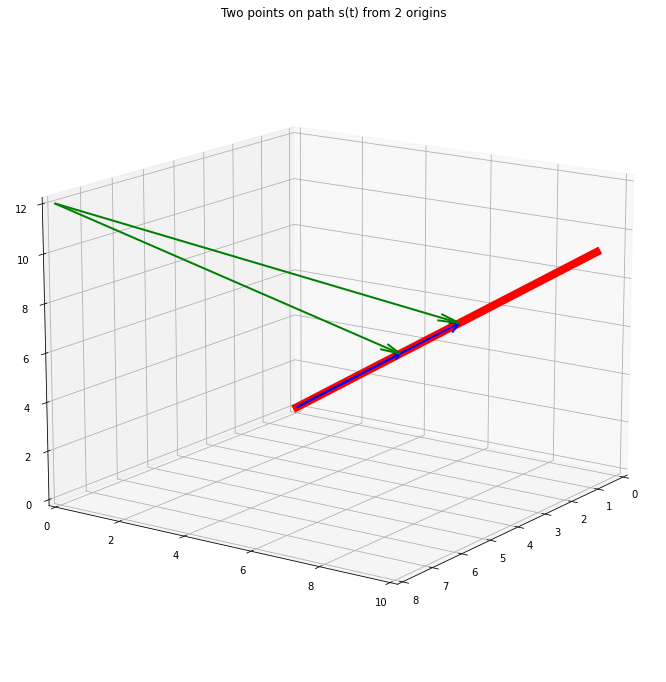

In [118]:
# Plotting
fig = plt.figure(figsize = (16,12))
ax = fig.add_subplot(111,projection='3d')
ax.set_xlim(0,8)
ax.set_ylim(0,10)
ax.set_zlim(0,12)
ax.view_init(elev=15., azim=35)

# Plot pairs of arrows from both origins to same points. linewidth is a tuple or generic because the 
#  vectors could be different widths or colors. Pretty cool.
ax.quiver(txO1,tyO1,tzO1,xR2,yR2,zR2,arrow_length_ratio=0.05, linewidth = [2,2],color=['blue','blue'])
ax.quiver(txO2,tyO2,tzO2,xR3,yR3,zR3,arrow_length_ratio=0.05, linewidth = 2,color='green')
ax.plot(xR, yR, zR, linewidth = 8, color='red') 

ax.set_title('Two points on path s(t) from 2 origins') 

# Commented out savefig for when I'm ready to save the plot for the lecture notes.
# plt.savefig('images/straightline.png')
plt.show()